In [ ]:
pip install numpy cv matplotlib

ERROR: Operation cancelled by user


In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
def display_image(image_array, title='', cmap='gray'):
    """Отображает изображение с помощью matplotlib"""
    plt.figure(figsize=(8, 6))
    plt.imshow(image_array, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

def display_images(image_arrays, titles=None, cols=3, cmap='gray', figsize=(15, 10)):
    """
    Отображает несколько изображений в виде сетки.

    Параметры:
        image_arrays : list of numpy.ndarray
            Список массивов изображений (в формате HWC или HW).
        titles : list of str, optional
            Заголовки для каждого изображения (должен совпадать с image_arrays по длине).
        cols : int, optional
            Количество столбцов в сетке (по умолчанию 3).
        cmap : str, optional
            Цветовая карта (по умолчанию 'gray' для ч/б изображений).
        figsize : tuple, optional
            Размер фигуры (ширина, высота) в дюймах (по умолчанию (15, 10)).
    """
    if not isinstance(image_arrays, (list, np.ndarray)):
        raise ValueError("image_arrays должен быть списком или массивом numpy.")

    if titles is not None and len(titles) != len(image_arrays):
        raise ValueError("Количество заголовков должно совпадать с количеством изображений.")
    rows = int(np.ceil(len(image_arrays) / cols))
    plt.figure(figsize=figsize)
    for i, image in enumerate(image_arrays):
        plt.subplot(rows, cols, i + 1)

        # Если изображение цветное (3 канала) и cmap='gray', игнорируем cmap
        if len(image.shape) == 3 and image.shape[-1] == 3 and cmap == 'gray':
            plt.imshow(image)
        else:
            plt.imshow(image, cmap=cmap)

        if titles is not None:
            plt.title(titles[i])
        plt.axis('off')

    plt.tight_layout()
    plt.show()

def image_to_CGarrays(image_str:str):
    imC = cv2.imread(image_str, cv2.IMREAD_COLOR_RGB)
    imG = cv2.imread(image_str, cv2.IMREAD_GRAYSCALE)
    return imC, imG


def add_gaussian_noise(image, mean=0, sigma=25):
    """
    Добавляет гауссовский шум к изображению.
    Параметры:
        image : numpy.ndarray
            Входное изображение (BGR или Grayscale).
        mean : float, optional
            Среднее значение шума (по умолчанию 0).
        sigma : float, optional
            Стандартное отклонение шума (по умолчанию 25).

    Возвращает:
        numpy.ndarray
            Зашумленное изображение того же типа, что и входное.
    """
    noise = np.random.normal(mean, sigma, image.shape).astype(np.int16) # astype(np.int16) позволяет избежать переполнения при сложении.
    noisy_image = image.astype(np.int16) + noise
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8) # astype(np.uint8) возвращает изображение в стандартном формате.
    # noisy_image = noisy_image.astype(np.ndarray)
    return noisy_image



(733, 1100, 3)


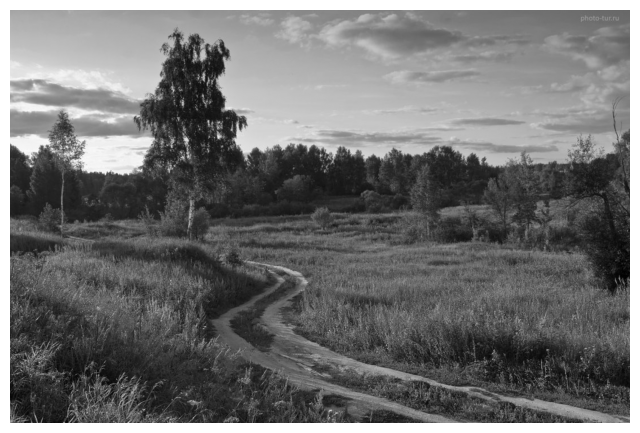

In [ ]:

#%%
imC, imG = image_to_CGarrays("img/peizaj.jpg")
print(imC.shape)
#%%

display_image(imG)

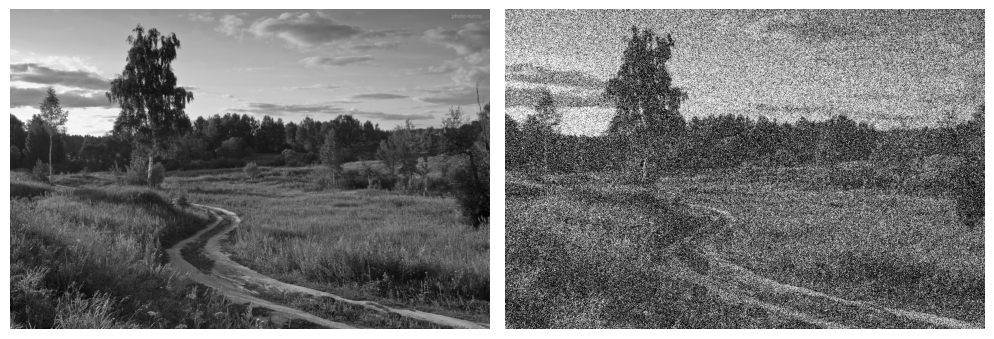

In [ ]:
#%%
noize_imgG = add_gaussian_noise(imG, 5, 110)
display_images([imG, noize_imgG])
#%%

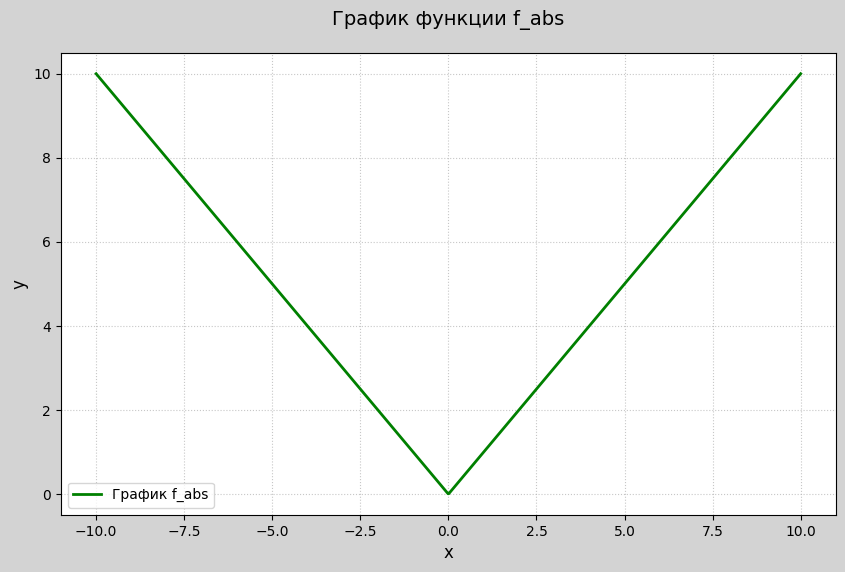

In [ ]:

def f_abs(x):
    return np.abs(x)

def draw_plot(func, x_min=-10, x_max=10, num_points=1000, line_color='blue', line_style='-', bg_color='white'):
    """
    Рисует график с настраиваемыми цветами и стилями.

    Параметры:
    - func: функция для рисования (например, lambda x: x**2)
    - x_min, x_max: диапазон x
    - num_points: количество точек
    - line_color: цвет линии ('red', 'green', '#FF00FF' и т. д.)
    - line_style: стиль линии ('-', '--', ':', '-.')
    - bg_color: цвет фона графика
    """
    x = np.linspace(x_min, x_max, num_points)
    y = func(x)

    # Создаем фигуру с заданным фоном
    plt.figure(figsize=(10, 6), facecolor='lightgray')  # Фон вокруг графика

    # Рисуем график с заданными параметрами линии
    plt.plot(x, y,
             color=line_color,
             linestyle=line_style,
             linewidth=2,
             label=f'График {func.__name__}')

    # Настраиваем фон внутри осей
    ax = plt.gca()
    ax.set_facecolor(bg_color)  # Фон области графика

    # Добавляем подписи
    plt.title(f'График функции {func.__name__}', fontsize=14, pad=20)
    plt.xlabel('x', fontsize=12)
    plt.ylabel('y', fontsize=12)

    plt.legend()
    plt.grid(True, linestyle=':', alpha=0.7)  # Сетка с пунктиром

    plt.show()
draw_plot(f_abs, line_color='green', line_style='-', bg_color='white')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f_abs(x):
  return np.abs(x)

# 5. Функция Хубера (смесь L₁ и L₂)
def f_huber(x, delta=1.0):
    """Функция Хубера (устойчива к выбросам)"""
    abs_x = np.abs(x)
    return np.sum(np.where(abs_x <= delta, 0.5 * x**2, delta * (abs_x - 0.5 * delta)))

# 6. Логистическая функция
def f_logistic(x):
    """Логистическая функция (для классификации)"""
    return np.sum(np.log(1 + np.exp(-x)))

# 7. Функция квадрата с порогом
def f_square_threshold(x, threshold=0.5):
    """Квадратичная функция с порогом активации"""
    return np.sum(np.where(np.abs(x) < threshold, x**2, 2*threshold*np.abs(x) - threshold**2))

# 8. Нулевая функция (для тестирования)
def f_zero(x):
    """Просто возвращает 0 (проксимальный оператор = вход)"""
    return 0

# 9. "Гребневая" функция
def f_ridge(x, epsilon=0.1):
    """Модифицированная L₂-норма с добавкой для устойчивости"""
    return np.sum(x**2 / (np.abs(x) + epsilon))
#%%
import numpy as np
import matplotlib.pyplot as plt

def f_abs(x):
  return np.abs(x)

def total_variation(image, p):
    if p < 1:
        raise ValueError("Параметр p должен быть больше или равен 1.")

    # Вычисляем горизонтальные и вертикальные разности
    # Функция np.diff вычисляет разности между соседними элементами массива вдоль указанной оси
    # Дополнение до 100×100 необходимо для того, чтобы массивы dx и dy имели одинаковый размер, что позволяет корректно вычислить их сумму.
    # Без этого шага программа не смогла бы выполнить сложение массивов, так как они имели бы разные размеры после применения np.diff.
    dx = np.abs(np.diff(image, axis=1))[:, :+1]
    dy = np.abs(np.diff(image, axis=0))[:+1, :]

    # Вычисляем сумму абсолютных значений разностей, возведённых в степень p
    tv_sum = np.sum((dx ** p) - (dy ** p))

    # Возвращаем результат, возводя сумму в степень 1/p
    return tv_sum ** (1 / p)
def lp_norm(image, p):
    if p < 1:
        raise ValueError("Параметр p должен быть больше или равен 1.")

    # Вычисляем сумму абсолютных значений элементов, возведённых в степень p
    sum_abs_p = np.sum(np.abs(image) ** p)

    # Возвращаем результат, возводя сумму в степень 1/p
    return sum_abs_p ** (1 / p)
def proximal_operator(func, v, lam=0.5, x_first=-10, x_last=10, x_count=500):
    """
    Вычисляет проксимальный оператор для функции func в точке v.

    Параметры:
    func: функция, для которой вычисляется проксимальный оператор (например, L1-норма)
    v: точка, относительно которой вычисляется проксимальный оператор
    lam: параметр регуляризации (λ > 0)
    x_first, x_last, x_count: параметры для создания сетки значений x

    Возвращает:
    Результат применения проксимального оператора к точке v
    """
    x_vals = np.linspace(x_first, x_last, x_count)
     #Вычисляем значение целевой функции для каждого x
    def objective(x):
        return func(x) + (1/(2*lam)) * np.linalg.norm(x - v)**2
    result = x_vals[np.argmin([objective(x) for x in x_vals])]

    return result


def prox_plot(f, x_first=-10, x_last=10, x_count=500, lam = 0.5):
    v_values = np.linspace(x_first, x_last, x_count)
    func_values = [f_abs(x) for x in v_values]
    prox_values = [proximal_operator(f_abs, v, lam) for v in v_values]

    plt.figure(figsize=(10, 6))
    plt.plot(v_values, func_values,  'g--', label=f'Функция {f.__name__}')
    plt.scatter(v_values, prox_values, s=0.8, c='b',marker='o', alpha=0.75, label=f'prox_{{λ={lam}}}')
    plt.title(f'Proximal Operator for {f.__name__} (λ={lam})')
    plt.xlabel('Input value v')
    plt.ylabel('Prox(v)')
    plt.grid(True)
    plt.legend()
    plt.show()

prox_plot(f_abs, x_first=-10, x_last=10, x_count=500, lam = 0.5)




NameError: name 'func' is not defined

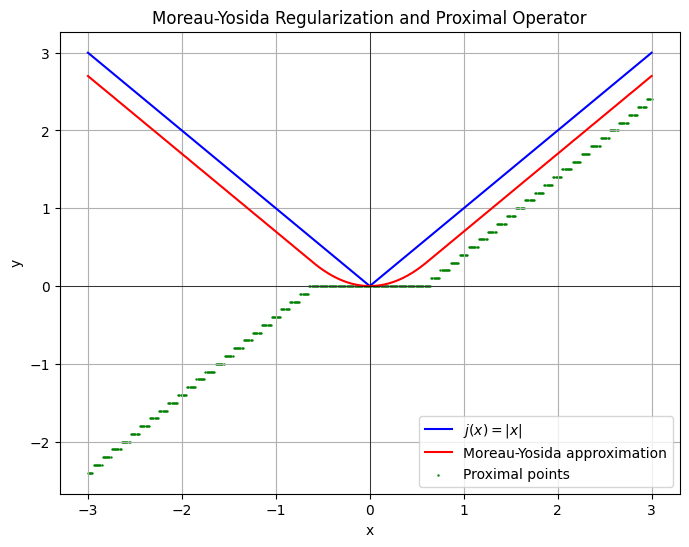

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def j(x):
    return np.abs(x)

def moreau_yoshida(f, l, k_vals, x, proximal_operator=False):
    values = np.array([f(k) + (1/(2*l))*(x - k)**2 for k in k_vals])
    min_index = np.argmin(values)
    min_value = values[min_index]
    prox_point = k_vals[min_index]
    if proximal_operator:
        return min_value, prox_point
    else:
        return min_value

# Параметры
l = 0.6
k_vals = np.linspace(-10, 10, 201)

# Создаем сетку для x
x_vals = np.linspace(-3, 3, 500)

# Вычисляем значения функций
j_vals = j(x_vals)
f_vals = np.array([moreau_yoshida(j, l, k_vals, x) for x in x_vals])
prox_vals = np.array([moreau_yoshida(j, l, k_vals, x, proximal_operator=True)[1] for x in x_vals])

# Построим графики
plt.figure(figsize=(8, 6))
plt.plot(x_vals, j_vals, label=r'$j(x) = |x|$', color='blue')
plt.plot(x_vals, f_vals, label=r'Moreau-Yosida approximation', color='red')
plt.scatter(x_vals, prox_vals, label=r'Proximal points', color='green', s=0.5)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.title('Moreau-Yosida Regularization and Proximal Operator')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
